**Prática de Histogramas**

1) 
- Produza a imagem ‘negativa’ do arquivo ‘im_cells.png’
- Com a imagem negativa, produza a imagem original novamente. 
- Mostre lado a lado a imagem original e a negativa. Em qual deles os objetos presentes na imagem são melhor percebidos? Justifique.
- Aplique a imagem uma função logarítmica.


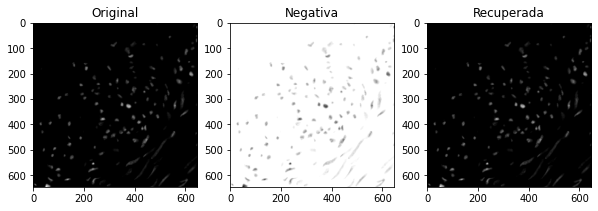

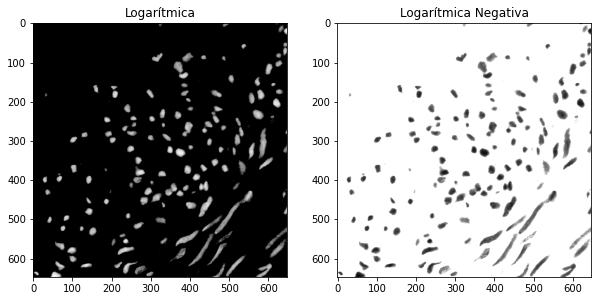

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Lendo a imagem
img = cv2.imread('im_cells.png', cv2.IMREAD_GRAYSCALE)

# Criando a imagem negativa
img_neg = 255 - img

# Recuperando a imagem original a partir da negativa
img_orig = 255 - img_neg

# Aplicando a função logarítmica
c = 255 / np.log(1 + np.max(img))
img_log = (c * np.log(1 + img)).astype(np.uint8)

img_log_neg = 255 - img_log

# Mostrando as imagens lado a lado
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(img_neg, cmap='gray')
axs[1].set_title('Negativa')
axs[2].imshow(img_orig, cmap='gray')
axs[2].set_title('Recuperada')


plt.show()

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_log, cmap='gray')
axs[0].set_title('Logarítmica')
axs[1].imshow(img_log_neg, cmap='gray')
axs[1].set_title('Logarítmica Negativa')

plt.show()





2)
- Abra a imagem 'pout.tif' e mostre seu histograma.
- Equalize a imagem anterior e mostre novamente seu histograma. Mostra a curva de transformação (consulte https://www.mathworks.com/help/images/histogram-equalization.html)
(procurar função OpenCV)



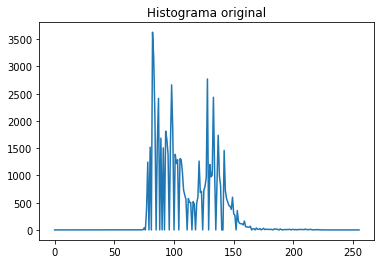

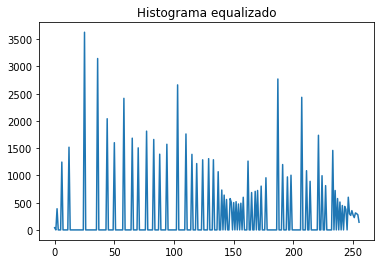

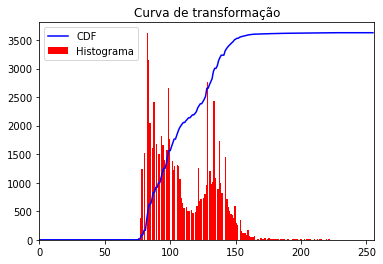

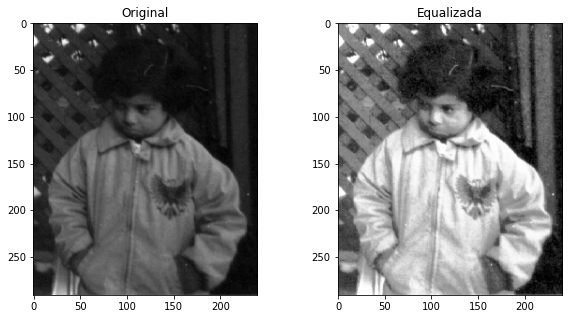

In [19]:
import numpy as np
from matplotlib import pyplot as plt

# Carrega a imagem em escala de cinza
img = cv2.imread('pout.tif', cv2.IMREAD_GRAYSCALE)

# Calcula e mostra o histograma
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist)
plt.title('Histograma original')
plt.show()

# Equaliza a imagem
img_eq = cv2.equalizeHist(img)

# Calcula e mostra o histograma da imagem equalizada
hist_eq = cv2.calcHist([img_eq], [0], None, [256], [0, 256])
plt.plot(hist_eq)
plt.title('Histograma equalizado')
plt.show()

# Mostra a curva de transformação
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()
plt.plot(cdf_normalized, color='b')
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('CDF', 'Histograma'), loc='upper left')
plt.title('Curva de transformação')
plt.show()

# Mostra as imagens original e equalizada
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(img_eq, cmap='gray')
axs[1].set_title('Equalizada')
plt.show()


3) *Implemente* o algoritmo de equalização de histograma e aplique a imagem ‘imcells.png’. Use o mínimos de laços for - tente realizar operações diretas com matrizes e vetores do numpy
- Aplique o mesmo algortimo 2x na mesma imagem e compare os resultados

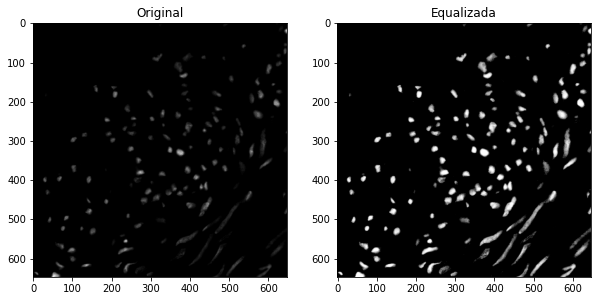

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carrega a imagem em escala de cinza
img = cv2.imread('im_cells.png', cv2.IMREAD_GRAYSCALE)

# Calcula o histograma da imagem
hist = np.zeros(256)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        #Conta quantas vezes cada valor de intensidade de pixel aparece na imagem
        hist[img[i, j]] += 1

# Calcula o número de pixels na imagem
num_pixels = img.shape[0] * img.shape[1]

# Calcula a distribuição de probabilidade do histograma
prob = hist / num_pixels

# Calcula a função de distribuição cumulativa (CDF) do histograma
cdf = np.zeros(256)
cdf[0] = prob[0]
for i in range(1, 256):
    cdf[i] = cdf[i-1] + prob[i]

# Normaliza a CDF
cdf_norm = np.uint8(255 * cdf)

# Equaliza a imagem
img_eq = np.zeros_like(img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        img_eq[i, j] = cdf_norm[img[i, j]]

# Mostra as imagens original e equalizada
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(img_eq, cmap='gray')
axs[1].set_title('Equalizada')
plt.show()
